In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso, Ridge, ElasticNet, RidgeCV
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import FeatureUnion
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv('final_df.csv')

In [3]:
# dropping the unknown salary figures
df = df[df.Salary != 0]

In [4]:
df.Salary.describe()

count     2605.000000
mean      5938.203972
std       2868.774864
min        222.000000
25%       4000.000000
50%       5500.000000
75%       6906.916327
max      25000.000000
Name: Salary, dtype: float64

In [5]:
# which joker put 222 as the salary?
df[df.Salary < 500].head()

,Company,Address,Description,Salary,title_Data Analyst,title_Analyst(others),title_Business Analyst,title_Data Scientist,title_Reseach Scientist,title_Data(others),...,seniority_Junior Executive,seniority_Manager,seniority_Entry Level,seniority_Professional,seniority_Executive,seniority_Senior Manager,industry_Human Resources Management/Consulting,industry_Information Technology,industry_Banking and Finance,industry_R&D
326,Smartblock Pte Ltd,Unknown,Unknown,475.0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
656,Kelly Services S Pte Ltd,Unknown,Unknown,396.0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1412,PrimusTech Private Limited,Unknown,"Contract, TemporaryDiploma, Bachelor's / Honou...",222.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1554,Borden Company Pte Ltd,Unknown,"PermanentBachelor's / Honours, Masters / PhDBr...",228.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3159,GROUP NAUTICAL PTE LIMITED,ECENTRE REDHILL JALAN BUKIT MERAH,InternshipRequirementsSkills and Qualification...,400.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [6]:
df = df[df.Salary > 1500]
df.reset_index(drop=True, inplace=True)

In [7]:
df.Salary.describe()

count     2580.000000
mean      5986.463312
std       2839.956296
min       1550.000000
25%       4000.000000
50%       5500.000000
75%       6906.916327
max      25000.000000
Name: Salary, dtype: float64

In [8]:
df['Salary'] = df.Salary.astype(int)

In [9]:
df.dtypes

Company                                            object
Address                                            object
Description                                        object
Salary                                              int32
title_Data Analyst                                  int64
title_Analyst(others)                               int64
title_Business Analyst                              int64
title_Data Scientist                                int64
title_Reseach Scientist                             int64
title_Data(others)                                  int64
title_Business(others)                              int64
title_Data Engineer                                 int64
location_Across                                     int64
location_Central                                    int64
location_West                                       int64
location_East                                       int64
location_North                                      int64
location_Overs

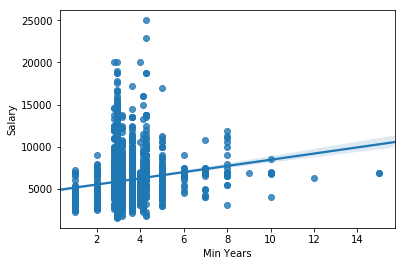

In [10]:
sns.regplot(df['Min Years'], df.Salary)

Train test split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Salary', axis=1), df.Salary, test_size=0.2, random_state=322)

In [12]:
def scorer(nlp, method, column):
    nlp.fit(X_train[column], y_train)
    method.fit(nlp.transform(X_train[column]), y_train)
    print('The mean salary prediction error is {}'.format(int(abs(method.predict(nlp.transform(X_test[column])) - y_test).mean())))
    print('The score is {:.4f}'.format(method.score(nlp.transform(X_test[column]), y_test)))

In [13]:
nlps = [(HashingVectorizer(ngram_range=(1,2)), 'Hashing Vectorizer'), 
        (TfidfVectorizer(ngram_range=(1,2)), 'Tfidf Vectorizer'), 
        (CountVectorizer(ngram_range=(1,2)), 'Count Vectorizer')]

In [14]:
methods = [(LinearRegression(), 'Linear Regression'),
           (Lasso(), 'Lasso'), 
           (Ridge(), 'Ridge'),]

A quick look at several vectorizing methods and how well the individual text columns predict salary based on different regression models

In [15]:
# for nlp in nlps:
#     for method in methods:
#         print('For '+ nlp[1] + ', ' + method[1] + ',')
#         try:
#             scorer(nlp[0], method[0], 'Company')
#         except:
#             print('error error')
#         print('-'*20)

In [16]:
# for nlp in nlps:
#     for method in methods:
#         print('For '+ nlp[1] + ', ' + method[1] + ',')
#         try:
#             scorer(nlp[0], method[0], 'Address')
#         except:
#             print('error error')
#         print('-'*20)

In [17]:
# holy shit this one takes years to run
# for nlp in nlps:
#     for method in methods:
#         print('For '+ nlp[1] + ', ' + method[1] + ',')
#         try:
#             scorer(nlp[0], method[0], 'Description')
#         except:
#             print('error error')
#         print('-'*20)

The general takeaway seems to be that regardless of vectorizing method, Ridge consistently outperforms the other regression models. That said, for both the 'Company' and 'Address' columns, Hashing Vectorizer scores the highest on average, while Tfidf performs the best for the 'Description' column. However, as the feature names cannot be gotten from the hashing vectorizer, Count Vectorizer will be used instead.

In [18]:
cv = CountVectorizer(ngram_range=(1,2))
tfid = TfidfVectorizer(ngram_range=(1,2), min_df=5)

In [19]:
X_test.reset_index(inplace=True, drop=True)
X_train.reset_index(inplace=True, drop=True)

In [20]:
cv.fit(X_train.Company)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [21]:
X_test = pd.concat([X_test, pd.DataFrame(cv.transform(X_test.Company).todense(), columns=['company_'+name for name in cv.get_feature_names()])], axis=1)
X_train = pd.concat([X_train, pd.DataFrame(cv.transform(X_train.Company).todense(), columns=['company_'+name for name in cv.get_feature_names()])], axis=1)

In [22]:
X_test.drop('Company', axis=1, inplace=True)
X_train.drop('Company', axis=1, inplace=True)

In [23]:
cv.fit(X_train.Address)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [24]:
X_test = pd.concat([X_test, pd.DataFrame(cv.transform(X_test.Address).todense(), columns=['address_'+name for name in cv.get_feature_names()])], axis=1)
X_train = pd.concat([X_train, pd.DataFrame(cv.transform(X_train.Address).todense(), columns=['address_'+name for name in cv.get_feature_names()])], axis=1)

In [25]:
X_test.drop('Address', axis=1, inplace=True)
X_train.drop('Address', axis=1, inplace=True)

In [26]:
tfid.fit(X_train.Description)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=5,
        ngram_range=(1, 2), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [27]:
X_test = pd.concat([X_test, pd.DataFrame(tfid.transform(X_test.Description).todense(), columns=['description_'+name for name in tfid.get_feature_names()])], axis=1)
X_train = pd.concat([X_train, pd.DataFrame(tfid.transform(X_train.Description).todense(), columns=['description_'+name for name in tfid.get_feature_names()])], axis=1)

In [28]:
X_test.drop('Description', axis=1, inplace=True)
X_train.drop('Description', axis=1, inplace=True)

In [29]:
X_train.shape

(2064, 22752)

In [30]:
ridge = Ridge()
ridge.fit(X_train, y_train)
ridge.score(X_test, y_test)

0.5210170572256003

In [31]:
print('The mean salary prediction error is {:.2f} dollars.'.format(abs(ridge.predict(X_test) - y_test).mean()))

The mean salary prediction error is 1410.47 dollars.


In [32]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)

0.16666666666666666

In [33]:
print('The mean salary prediction error is {:.2f} dollars.'.format(abs(rfc.predict(X_test) - y_test).mean()))

The mean salary prediction error is 1742.72 dollars.


As can be seen from above, random forest classifier does a poor job of predicting the salary from the data compared to ridge regression.

In [34]:
df.columns

Index(['Company', 'Address', 'Description', 'Salary', 'title_Data Analyst',
       'title_Analyst(others)', 'title_Business Analyst',
       'title_Data Scientist', 'title_Reseach Scientist', 'title_Data(others)',
       'title_Business(others)', 'title_Data Engineer', 'location_Across',
       'location_Central', 'location_West', 'location_East', 'location_North',
       'location_Overseas', 'Min Years', 'seniority_Senior Executive',
       'seniority_Junior Executive', 'seniority_Manager',
       'seniority_Entry Level', 'seniority_Professional',
       'seniority_Executive', 'seniority_Senior Manager',
       'industry_Human Resources Management/Consulting',
       'industry_Information Technology', 'industry_Banking and Finance',
       'industry_R&D'],
      dtype='object')

In [35]:
coefs = sorted(list(zip(ridge.coef_, X_test.columns)), reverse=True)

From here we can see that company names that have 'novartis', 'macdonald', 'billigence', 'marall' and 'lego' in it are the highest paying companies.

In [36]:
[(i,j) for i,j in coefs if 'company' in j][:10]

[(3056.4346772799363, 'company_novartis singapore'),
 (3056.4346772799363, 'company_novartis'),
 (1992.3175441358082, 'company_macdonald and'),
 (1992.3175441358082, 'company_macdonald'),
 (1992.3175441358082, 'company_and company'),
 (1869.8043662497787, 'company_billigence'),
 (1737.3330632651214, 'company_marall services'),
 (1737.3330632651214, 'company_marall'),
 (1611.7605472707617, 'company_lego singapore'),
 (1611.7605472707617, 'company_lego')]

On the other hand, companies with the words 'ascent', 'cloak', 'zendesk', 'power' and 'trakomatic' are likely to pay less.

In [37]:
[(i,j) for i,j in coefs if 'company' in j][:-12:-1]

[(-1018.0200240004194, 'company_ascent'),
 (-1018.0200240004194, 'company_ascent asia'),
 (-1018.0200240004194, 'company_pulley'),
 (-1018.0200240004194, 'company_pulley ascent'),
 (-954.159989343352, 'company_cloak'),
 (-954.159989343352, 'company_cloak pte'),
 (-940.2367724532891, 'company_zendesk'),
 (-940.2367724532891, 'company_zendesk singapore'),
 (-931.5752381462089, 'company_power'),
 (-864.8328610494094, 'company_trakomatic'),
 (-864.8328610494094, 'company_trakomatic pte')]

Likewise for address

In [38]:
[(i,j) for i,j in coefs if 'address' in j][:10]

[(1595.3420388963318, 'address_square north'),
 (1595.3420388963318, 'address_parkview square'),
 (1595.3420388963318, 'address_parkview'),
 (1454.745522783558, 'address_malaysia kl'),
 (1454.745522783558, 'address_kl'),
 (1310.454295586454, 'address_malaysia'),
 (1170.1933844999512, 'address_two'),
 (1170.1933844999512, 'address_tower two'),
 (1165.2501950423407, 'address_comcentre exeter'),
 (1122.4401360803292, 'address_exeter road')]

In [39]:
[(i,j) for i,j in coefs if 'address_' in j][:-10:-1]

[(-1272.8706465525738, 'address_centre eunos'),
 (-1257.9597875540617, 'address_street singapore'),
 (-789.0102858596272, 'address_industrial'),
 (-787.3868463393494, 'address_quay ocean'),
 (-736.6824418952039, 'address_place singapore'),
 (-703.0656461974577, 'address_four temasek'),
 (-688.1570076281262, 'address_one harbourfront'),
 (-623.3400370841141, 'address_octagon the'),
 (-623.3400370841141, 'address_the cecil')]

Description

In [40]:
[(i,j) for i,j in coefs if 'description_' in j][:10]

[(2014.3410928904343, 'description_trading'),
 (1925.410702310025, 'description_india'),
 (1836.143810089632, 'description_across'),
 (1683.2726268059628, 'description_strategy'),
 (1654.5923220469556, 'description_integration'),
 (1565.2964857182817, 'description_banking'),
 (1559.4319585982282, 'description_power'),
 (1525.3253689314356, 'description_engagements'),
 (1476.889930147725, 'description_digital'),
 (1431.126114983525, 'description_lead')]

Title

In [41]:
[(i,j) for i,j in coefs if 'title_' in j][:10]

[(489.7950873178197, 'title_Data Scientist'),
 (-46.406222262347455, 'title_Reseach Scientist'),
 (-283.199403140361, 'title_Business Analyst'),
 (-288.4182772403474, 'title_Data(others)'),
 (-406.54162611650963, 'title_Analyst(others)'),
 (-477.05193889405837, 'title_Business(others)'),
 (-536.4921517676657, 'title_Data Analyst'),
 (-943.4706781196105, 'title_Data Engineer')]

Location

In [42]:
[(i,j) for i,j in coefs if 'location_' in j][:10]

[(328.9624543450375, 'location_North'),
 (166.99091926197798, 'location_Across'),
 (101.70655770972235, 'location_East'),
 (34.17442868144508, 'location_West'),
 (-85.76452403453641, 'location_Central'),
 (-1034.5880066725479, 'location_Overseas')]

Seniority

In [43]:
[(i,j) for i,j in coefs if 'seniority_' in j][:10]

[(2390.294879153078, 'seniority_Senior Manager'),
 (1381.2466405631822, 'seniority_Manager'),
 (1018.7158034697004, 'seniority_Professional'),
 (371.03753027667517, 'seniority_Senior Executive'),
 (-588.5244881946774, 'seniority_Executive'),
 (-679.8133285493382, 'seniority_Junior Executive'),
 (-1183.0016292407854, 'seniority_Entry Level')]

Industry

In [44]:
[(i,j) for i,j in coefs if 'industry_' in j][:10]

[(602.5669375734979, 'industry_Banking and Finance'),
 (503.34916551437254, 'industry_Information Technology'),
 (359.5772587832471, 'industry_Human Resources Management/Consulting'),
 (254.81243094445335, 'industry_R&D')]

Moving on to attempting to predict job title using the other categories:

In [45]:
df.columns

Index(['Company', 'Address', 'Description', 'Salary', 'title_Data Analyst',
       'title_Analyst(others)', 'title_Business Analyst',
       'title_Data Scientist', 'title_Reseach Scientist', 'title_Data(others)',
       'title_Business(others)', 'title_Data Engineer', 'location_Across',
       'location_Central', 'location_West', 'location_East', 'location_North',
       'location_Overseas', 'Min Years', 'seniority_Senior Executive',
       'seniority_Junior Executive', 'seniority_Manager',
       'seniority_Entry Level', 'seniority_Professional',
       'seniority_Executive', 'seniority_Senior Manager',
       'industry_Human Resources Management/Consulting',
       'industry_Information Technology', 'industry_Banking and Finance',
       'industry_R&D'],
      dtype='object')

In [46]:
def dedummy(df):
    roles = [column.replace('title_', '') for column in df.columns if 'title_' in column]
    titles = df[[column for column in df.columns if 'title_' in column]]
    temp = []
    for k in range(len(titles)):
        if titles.loc[k].sum() == 0:
            temp.append('Unknown')
        else:
            temp.append([j for i,j in zip(titles.loc[k], roles) if i == 1][0])
    df['Title'] = temp
    
    for column in df.columns:
        if 'title_' in column:
            df.drop(column, axis=1, inplace=True)

In [47]:
dedummy(X_train)
dedummy(X_test)

In [48]:
y_train = X_train.Title
y_test = X_test.Title

In [49]:
X_train = X_train.drop('Title', axis=1)
X_test = X_test.drop('Title', axis=1)

In [50]:
logit = LogisticRegression()
logit.fit(X_train, y_train)
logit.score(X_test, y_test)

MemoryError: 

In [ ]:
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)